In [2]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [5]:
dir_path = "/Users/admin/Documents/BT4012/Project/BT4012_Reviews/Notebooks/feature engineering"
os.chdir(dir_path)
df = pd.read_csv('data_cleaned.csv')

In [6]:
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,restaurantID,flagged,reviewerName,reviewerLocation,reviewerYelpJoinDate,reviewerFriendCount,...,sentiment,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",pbEiXam9YJL3neCYHGwLUA,0,Scott E.,"Glengary, WV",2009-10-01,0.002337,...,"Sentiment(polarity=0.13913951545530495, subjec...",0.139140,0.528655,0.868421,False,False,False,False,True,5
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,pbEiXam9YJL3neCYHGwLUA,0,Jerry K.,"Palos Verdes Peninsula, CA",2011-06-01,0.000000,...,"Sentiment(polarity=0.4666666666666666, subject...",0.466667,0.566667,0.263158,False,False,False,False,True,5
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,pbEiXam9YJL3neCYHGwLUA,0,Patricia M.,"Chicago, IL",2008-09-01,0.000425,...,"Sentiment(polarity=0.4133333333333334, subject...",0.413333,0.720000,0.473684,False,False,True,False,False,3
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",pbEiXam9YJL3neCYHGwLUA,0,Terry N.,"San Jose, CA",2007-10-01,0.017850,...,"Sentiment(polarity=0.12054824561403507, subjec...",0.120548,0.535201,0.868421,False,False,True,False,False,3
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,pbEiXam9YJL3neCYHGwLUA,0,Shradha Vegetarianista A.,"Chicago, IL",2007-07-01,0.070761,...,"Sentiment(polarity=0.16746031746031745, subjec...",0.167460,0.564683,0.868421,False,False,False,False,True,5


In [8]:
df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'tokens', 'clean_tokens', 'clean_text', 'ngrams', 'preprocessed',
       'main_topic', 'Num_Char', 'Num_Punc', 'verb_count', 'adj_count',
       'sentiment', 'polarity', 'subject

In [7]:
num_columns = df.shape[1]
print(num_columns)

61


In [14]:
column_data_types = df.dtypes
print(column_data_types)

reviewDate        object
reviewID          object
reviewerID        object
reviewContent     object
restaurantID      object
                   ...  
reviewRating_2     int64
reviewRating_3     int64
reviewRating_4     int64
reviewRating_5     int64
reviewRating       int64
Length: 61, dtype: object


In [11]:
string_columns = df.select_dtypes(include=['object']).columns
df_numerical = df.drop(columns=string_columns)

In [21]:
X = df_numerical.drop(["flagged", "polarity"] ,axis=1 )
y = df_numerical['flagged']

In [20]:
X

,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,reviewerComplimentCount,reviewerTipCount,reviewerFanCount,resReviewCount,...,verb_count,adj_count,polarity,subjectivity,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,0.002337,0.018008,0.018008,0.001885,0.000254,0.000279,0.000050,0.000000,0.001563,841,...,0.776256,0.427350,1.391395e-01,0.528655,0,0,0,0,1,5
1,0.000000,0.001149,0.001149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,841,...,0.068493,0.068376,4.666667e-01,0.566667,0,0,0,0,1,5
2,0.000425,0.003831,0.003831,0.000276,0.000000,0.000056,0.000000,0.000000,0.000000,841,...,0.063927,0.042735,4.133333e-01,0.720000,0,0,1,0,0,3
3,0.017850,0.022605,0.022605,0.001609,0.000406,0.000335,0.000150,0.005078,0.000000,841,...,0.237443,0.290598,1.205482e-01,0.535201,0,0,1,0,0,3
4,0.070761,0.462835,0.462835,0.075869,0.034472,0.023258,0.007082,0.010157,0.109375,841,...,0.123288,0.170940,1.674603e-01,0.564683,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,0.006587,0.062835,0.062835,0.009242,0.002843,0.000948,0.000601,0.000000,0.004687,14,...,0.105023,0.051282,2.266234e-01,0.760173,0,0,0,1,0,4
26952,0.001275,0.003831,0.003831,0.000322,0.000102,0.000000,0.000025,0.000000,0.001563,15,...,0.077626,0.076923,2.692708e-01,0.608333,0,0,0,0,1,5
26953,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,16,...,0.027397,0.042735,-1.190476e-01,0.588095,0,0,1,0,0,3
26954,0.002762,0.018391,0.018391,0.002667,0.000457,0.000558,0.000175,0.000462,0.001563,17,...,0.068493,0.042735,6.938894e-18,0.658333,0,0,1,0,0,3


In [24]:
## Chi2 Test for Feature Selection
selector = SelectKBest(chi2, k=15)
fit = selector.fit(X, y)
chi2_selected = selector.get_support()
importance_df_chi = pd.DataFrame()
importance_df_chi['Feature'] = X.columns 
importance_df_chi['Important_chi'] = chi2_selected
importance_df_chi

,Feature,Important_chi
0,reviewerFriendCount,True
1,reviewerNumReviews,True
2,reviewerFirstCount,True
3,reviewerUsefulCount,True
4,reviewerCoolCount,True
5,reviewerFunnyCount,False
6,reviewerComplimentCount,False
7,reviewerTipCount,False
8,reviewerFanCount,True
9,resReviewCount,True


In [28]:
selected_features = importance_df_chi[importance_df_chi['Important_chi']]
print(selected_features)

                        Feature  Important_chi
0           reviewerFriendCount           True
1            reviewerNumReviews           True
2            reviewerFirstCount           True
3           reviewerUsefulCount           True
4             reviewerCoolCount           True
8              reviewerFanCount           True
9                resReviewCount           True
17               DATE_TIME_flag           True
23  date_diff_joinedandreviewed           True
25                     Num_Char           True
28                    adj_count           True
30               reviewRating_1           True
32               reviewRating_3           True
33               reviewRating_4           True
34               reviewRating_5           True


In [29]:
selected_features = selected_features['Feature'].tolist()
selected_features

['reviewerFriendCount',
 'reviewerNumReviews',
 'reviewerFirstCount',
 'reviewerUsefulCount',
 'reviewerCoolCount',
 'reviewerFanCount',
 'resReviewCount',
 'DATE_TIME_flag',
 'date_diff_joinedandreviewed',
 'Num_Char',
 'adj_count',
 'reviewRating_1',
 'reviewRating_3',
 'reviewRating_4',
 'reviewRating_5']

In [31]:
X_features_selected = X[selected_features]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6234
           1       0.78      0.72      0.75      1853

    accuracy                           0.89      8087
   macro avg       0.85      0.83      0.84      8087
weighted avg       0.89      0.89      0.89      8087



#### XGBoost Feature Selection 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_numerical.drop('flagged', axis=1)
y = df_numerical['flagged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 25% test set 

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # standardize features 
X_test_scaled = ss.transform(X_test) # same scaling 


In [13]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

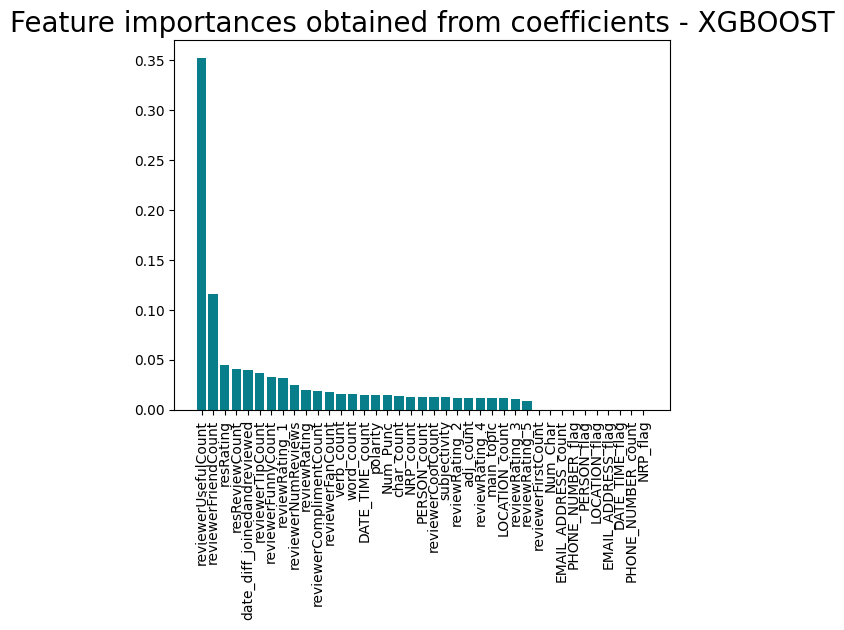

In [15]:
import matplotlib.pyplot as plt 

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients - XGBOOST', size=20)
plt.xticks(rotation='vertical')
plt.show()